# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">1.  📊 Exploratory Data Analysis (EDA)
 </p>

This notebook performs comprehensive exploratory data analysis on the e-commerce recommendation dataset.

## Objectives:
1. Understand the dataset structure
2. Analyze data quality and missing values
3. Explore user behavior patterns
4. Analyze product characteristics
5. Examine event types and distributions
6. Identify data quality issues
7. Generate insights for feature engineering


In [1]:
# pip install matplotlib

In [2]:
# !pip install seaborn

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuration
DATA_PATH = "..\\data\\raw\\csv_for_case_study_V1.csv"
OUTPUT_DIR = Path("../artifacts/eda")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Libraries imported!")


✅ Libraries imported!


## 1. Data Loading and Initial Inspection

This step loads the raw dataset and provides a basic overview of its structure.

In [4]:
# Load data
print("=" * 70)
print("📂 LOADING DATA")
print("=" * 70)

df = pd.read_csv(DATA_PATH)

print(f"\n Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n Columns: {list(df.columns)}")


📂 LOADING DATA

 Dataset Shape: 500,000 rows × 6 columns

 Columns: ['index', 'product_id', 'customer_id', 'product_name', 'Event_Date', 'Event']


In [5]:
# Display first few rows
print("\n" + "=" * 70)
print("FIRST 5 ROWS")
print("=" * 70)
df.head()



FIRST 5 ROWS


,index,product_id,customer_id,product_name,Event_Date,Event
0,2112112,1,2726055,سائل غسيل للملابس طبيعي عدد 2 عبوة بحجم 1.8 لتر,2023-03-28 02:03:31+00:00,purchased
1,12110444,2,8307875,عطر 002,2023-02-07 23:23:49+00:00,cart
2,8908469,3,14308668,ريجليز بوبا بوبا شريط لبان علكة بنكهة الفراولة...,2023-03-16 20:37:03+00:00,cart
3,40921,4,13235575,ساعة يد رجالية M34-2,2023-02-22 17:27:47+00:00,cart
4,14635759,5,1652827,فوط تنظيف ميكروفايبر ريكسو - 6 حبات,2023-02-28 19:05:40+00:00,cart


In [6]:
# Basic info
print("\n" + "=" * 70)
print("ℹ️  DATA INFO")
print("=" * 70)
df.info()



ℹ️  DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         500000 non-null  int64 
 1   product_id    500000 non-null  int64 
 2   customer_id   500000 non-null  int64 
 3   product_name  500000 non-null  object
 4   Event_Date    477821 non-null  object
 5   Event         500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [7]:
# ============================================================
# STATISTICAL SUMMARY - NUMERIC AND CATEGORICAL
# ============================================================

print("\n" + "=" * 70)
print("📊 NUMERIC COLUMNS SUMMARY")
print("=" * 70)
numeric_summary = df.describe()  
print(numeric_summary)





📊 NUMERIC COLUMNS SUMMARY
              index     product_id   customer_id
count  5.000000e+05  500000.000000  5.000000e+05
mean   1.183120e+07   57898.735356  5.673336e+06
std    9.716113e+06   58059.026328  4.243224e+06
min    3.000000e+00       1.000000  2.000000e+00
25%    4.215480e+06    7382.000000  1.993966e+06
50%    9.774238e+06   36248.000000  4.741165e+06
75%    1.540743e+07   97750.000000  8.892994e+06
max    4.078837e+07  200325.000000  1.467520e+07


This step provides statistical summaries of the numeric columns, including:
- `index`, `product_id`, `customer_id`
- Shows count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)  
- Helps understand data distribution and detect potential outliers

In [8]:
print("\n" + "=" * 70)
print("📊 CATEGORICAL COLUMNS SUMMARY")
print("=" * 70)
categorical_summary = df.describe(include=['object', 'category'])
print(categorical_summary)


📊 CATEGORICAL COLUMNS SUMMARY
       product_name                 Event_Date   Event
count        500000                     477821  500000
unique       182256                     450816       5
top         عطر 379  2023-02-16 17:15:43+00:00    cart
freq           2556                         14  305129


This step provides statistical summaries of the categorical columns, including:
- `product_name`, `Event`, `Event_Date`
- Shows count, number of unique values, most frequent value (top), and its frequency
- Helps understand category distribution and identify dominant classes

## 2. Data Quality Analysis


🔍 MISSING VALUES ANALYSIS
      Column  Missing Count  Missing Percentage
  Event_Date          22179              4.4358
       index              0              0.0000
  product_id              0              0.0000
 customer_id              0              0.0000
product_name              0              0.0000
       Event              0              0.0000


<Figure size 1000x600 with 0 Axes>

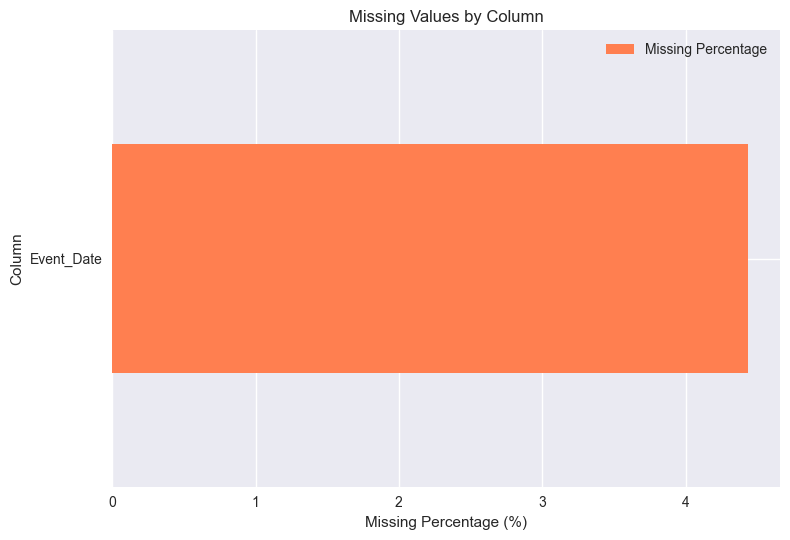

In [9]:
# Missing values analysis
print("=" * 70)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing Percentage': missing_pct.values
}).sort_values('Missing Count', ascending=False)

print(missing_df.to_string(index=False))

# Visualize missing values
if missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Missing Count'] > 0].plot(
        x='Column', y='Missing Percentage', kind='barh',
        title='Missing Values by Column',
        color='coral'
    )
    plt.xlabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✅ No missing values found!")


In [10]:
# # Convert event_date to datetime
# df['event_date'] = pd.to_datetime(df['Event_Date'], errors='coerce')

# # Date range
# print("=" * 70)
# print("📅 TEMPORAL ANALYSIS")
# print("=" * 70)

# print(f"Date Range: {df['event_date'].min()} to {df['event_date'].max()}")
# print(f"Total Days: {(df['event_date'].max() - df['event_date'].min()).days}")
# print(f"Missing Dates: {df['event_date'].isnull().sum():,} ({df['event_date'].isnull().sum()/len(df)*100:.2f}%)")
# # median_date = df['event_date'].median()
# # df['event_date'] = df['event_date'].fillna(median_date)
# # Interactions over time
# df['year'] = df['event_date'].dt.year
# df['month'] = df['event_date'].dt.month
# df['day'] = df['event_date'].dt.day
# df['day_of_week'] = df['event_date'].dt.dayofweek
# df['hour'] = df['event_date'].dt.hour

# # Daily interactions
# daily_interactions = df.groupby(df['event_date'].dt.date).size()

# plt.figure(figsize=(15, 6))
# daily_interactions.plot(kind='line', color='steelblue', linewidth=1.5)
# plt.title('Daily Interactions Over Time', fontsize=14, fontweight='bold')
# plt.xlabel('Date')
# plt.ylabel('Number of Interactions')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(OUTPUT_DIR / 'daily_interactions.png', dpi=300, bbox_inches='tight')
# plt.show()


In [11]:
# Filter rows with missing Event_Date
missing_event_df = df[df['Event_Date'].isnull()]

# Basic summary
total_rows_missing = len(missing_event_df)
unique_users_missing = missing_event_df['customer_id'].nunique()
unique_products_missing = missing_event_df['product_id'].nunique()
total_interactions_missing = missing_event_df.shape[0]

print(f"Total rows with missing Event_Date: {total_rows_missing}")
print(f"Unique users: {unique_users_missing}")
print(f"Unique products: {unique_products_missing}")
print(f"Total interactions (events) missing date: {total_interactions_missing}")

# Optional: summary by event type
summary_by_event = (
    missing_event_df.groupby('Event')
    .agg(
        interactions=('Event', 'count'),
        unique_users=('customer_id', 'nunique'),
        unique_products=('product_id', 'nunique')
    )
    .sort_values('interactions', ascending=False)
)

summary_by_event


Total rows with missing Event_Date: 22179
Unique users: 20901
Unique products: 17011
Total interactions (events) missing date: 22179


,interactions,unique_users,unique_products
Event,,,
wishlist,22179,20901,17011


In [12]:
df.columns

Index(['index', 'product_id', 'customer_id', 'product_name', 'Event_Date',
       'Event'],
      dtype='object')

In [13]:
# Count unique users per product
product_user_counts = df.groupby('product_id')['customer_id'].nunique()

# Count unique products per user
user_product_counts = df.groupby('customer_id')['product_id'].nunique()

# Find products with only one user
products_one_user = product_user_counts[product_user_counts == 1].index

# Find users with only one product
users_one_product = user_product_counts[user_product_counts == 1].index

# Merge to find true one-to-one interactions
one_to_one_pairs = df[
    (df['product_id'].isin(products_one_user)) &
    (df['customer_id'].isin(users_one_product))
][['customer_id', 'product_id']].drop_duplicates()

print(f"Number of one-to-one user-product interactions: {len(one_to_one_pairs):,}")
print("Some one-to-one interactions:")
print(one_to_one_pairs.head(10))


Number of one-to-one user-product interactions: 101,474
Some one-to-one interactions:
    customer_id  product_id
3      13235575           4
7        193403           8
9        876328          10
11     13197905          12
23     12674187          24
42      6301169          43
43      2920170          44
48        18675          49
49     12182848          50
55      1930231          56


# Handling Missing `Event_Date` in Whitelist Events

#### Dataset Context
- Total missing `Event_Date` rows: 22,179 (~4.4%)  
- All missing rows correspond to **whitelist events**  
- Valid events in the dataset are distributed over time  
- The majority of events occur **around the median date**

#### Why Not Forward-Fill (`ffill`)
- Forward-fill copies the **last valid value above a missing row**  
- Risks in this dataset:  
  - Missing whitelist dates could inherit dates from unrelated events, creating unrealistic timestamps  
  - May distort time-based train/test splits, affecting model evaluation  
  - Applying `ffill` globally may alter **other columns unintentionally**  

> Example: A missing whitelist event could get a purchase event date, which is **not realistic**

#### Why Not Mean or Random Dates
- **Mean** is sensitive to outliers and may not reflect the central tendency of the event distribution  
- **Random dates** introduce noise and place events far from the bulk of interactions, reducing realism  

#### Why Use Median
- **Median represents the central point** of the dataset s event distribution  
- Most events occur around this date, making it a **realistic placeholder**  
- Robust to outliers and preserves **train/test split integrity**  
- Special consideration: since all whitelist dates are missing, the median is computed from the **entire dataset**


In [14]:
# Forward-fill all missing values
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
median_date = df['event_date'].median()
df['event_date'] = df['event_date'].fillna(median_date)


KeyError: 'event_date'

In [ ]:
# Duplicate rows
print("\n" + "=" * 70)
print("🔄 DUPLICATE ANALYSIS")
print("=" * 70)

duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))



🔄 DUPLICATE ANALYSIS
Total duplicate rows: 0 (0.00%)


In [ ]:
user_counts = df.groupby('customer_id').size()

# Users with only one interaction
single_interaction_users = user_counts[user_counts == 1]
single_interaction_users

customer_id
2           1
49          1
57          1
147         1
156         1
           ..
14668621    1
14668799    1
14670497    1
14673872    1
14675204    1
Length: 384428, dtype: int64

In [ ]:
# ============================================================
# CELL 2.5: CLEAN & PREPARE PRODUCT NAMES (Arabic + Units) - FUNCTIONAL
# ============================================================
import re
from collections import Counter
import pandas as pd

print("=" * 70)
print("🧼 CLEANING PRODUCT NAMES (Arabic + Units) - FUNCTIONS")
print("=" * 70)

# ------------------------------
# Arabic stopwords (expand anytime)
# ------------------------------
arabic_stopwords = {
    "من", "مع", "في", "على", "و", "الى", "عن", "هذا", "ذلك", 
    "او", "اي", "كل", "ثم", "هو", "هي"
}

# ============================================================
# Function 1: Normalize units (all variations → one standard)
# ============================================================
def normalize_units(text):
    text = str(text)
    # Normalize ML / مل
    ml_patterns = [r"\bML\b", r"\bMl\b", r"\bml\b", r"\bمل\b", r"\bملي\b", r"\bمليلتر\b"]
    for pat in ml_patterns:
        text = re.sub(pat, " مل ", text, flags=re.IGNORECASE)
    # Normalize KG / كيلو
    kg_patterns = [r"\bKG\b", r"\bKg\b", r"\bkg\b", r"\bكيلو\b", r"\bكغ\b"]
    for pat in kg_patterns:
        text = re.sub(pat, " كيلو ", text, flags=re.IGNORECASE)
    return text

# ============================================================
# Function 2: Clean product name (remove stopwords, symbols, numbers)
# ============================================================
def clean_product_name(name, stopwords=arabic_stopwords):
    name = str(name)
    # Apply unit normalization
    name = normalize_units(name)
    # Keep only Arabic, English letters, and spaces
    name = re.sub(r"[^\w\s\u0600-\u06FF]", " ", name)
    # Remove numbers
    name = re.sub(r"\d+", " ", name)
    # Normalize multiple spaces
    name = re.sub(r"\s+", " ", name).strip()
    # Tokenize
    words = name.split()
    # Remove stopwords
    words = [w for w in words if w not in stopwords]
    return words

# ============================================================
# Function 3: Count word frequencies
# ============================================================
def count_cleaned_words(df, column='product_name'):
    df['clean_words'] = df[column].astype(str).apply(clean_product_name)
    all_words = [word for words in df['clean_words'] for word in words]
    counts = Counter(all_words)
    counts_df = pd.DataFrame(counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
    return counts_df

# ============================================================
# Function 4: Detect units (after normalization)
# ============================================================
def detect_units(df, column='product_name'):
    series = df[column].astype(str).apply(normalize_units)
    units = ['مل', 'كيلو']  # normalized units
    unit_counts = {unit: int(series.str.count(fr"\b{unit}\b").sum()) for unit in units}
    return unit_counts

# ============================================================
# Function 5: Normalize and clean in-place (update clean_words & cleaned_text)
# ============================================================
def normalize_and_clean_simple(df, column='product_name'):
    for idx, text in df[column].astype(str).items():
        text = normalize_units(text)
        # Clean text
        text_clean = re.sub(r"[^\w\s\u0600-\u06FF]", " ", text)
        text_clean = re.sub(r"\s+", " ", text_clean).strip()
        words = [w for w in text_clean.split() if w not in arabic_stopwords]
        # Update columns in-place
        df.at[idx, 'clean_words'] = words
        df.at[idx, 'cleaned_text'] = " ".join(words)
    return df

# ============================================================
# USAGE EXAMPLES:
# ============================================================

# 1️⃣ Count cleaned words
cleaned_word_counts_df = count_cleaned_words(df)
print("\n📊 Top 20 frequent cleaned words:")
print(cleaned_word_counts_df.head(20))

# 2️⃣ Detect units
unit_counts = detect_units(df)
print("\n📦 Unit counts found:")
print(unit_counts)

# 3️⃣ Apply normalized & cleaned text in-place
df = normalize_and_clean_simple(df)
print("\n📝 Sample cleaned_text & clean_words:")
print(df[['product_name', 'cleaned_text', 'clean_words']].head(5))


🧼 CLEANING PRODUCT NAMES (Arabic + Units) - FUNCTIONS

📊 Top 20 frequent cleaned words:
       word  count
8       عطر  37643
211      مل  21133
91     جرام  12325
26    عباية  11981
542     طقم  10629
106     عرض  10369
342    كريم  10012
114    كيلو   9407
101     بكج   8983
70     اسود   8966
241  مجموعة   8806
17     ساعة   7837
348  اشتراك   7681
41        G   7367
470     لون   7315
686   ايفون   7237
34     جهاز   6797
131     شدة   6020
592     شهر   6002
121     حبة   5887

📦 Unit counts found:
{'مل': 13647, 'كيلو': 7431}

📝 Sample cleaned_text & clean_words:
                                        product_name  \
0    سائل غسيل للملابس طبيعي عدد 2 عبوة بحجم 1.8 لتر   
1                                            عطر 002   
2  ريجليز بوبا بوبا شريط لبان علكة بنكهة الفراولة...   
3                               ساعة يد رجالية M34-2   
4                فوط تنظيف ميكروفايبر ريكسو - 6 حبات   

                                        cleaned_text  \
0    سائل غسيل للملابس طبيعي عدد

## 3. Event Analysis


📊 EVENT DISTRIBUTION
         Event  Count  Percentage
          cart 305129     61.0258
     purchased 166423     33.2846
      wishlist  22179      4.4358
search_keyword   3190      0.6380
        rating   3079      0.6158


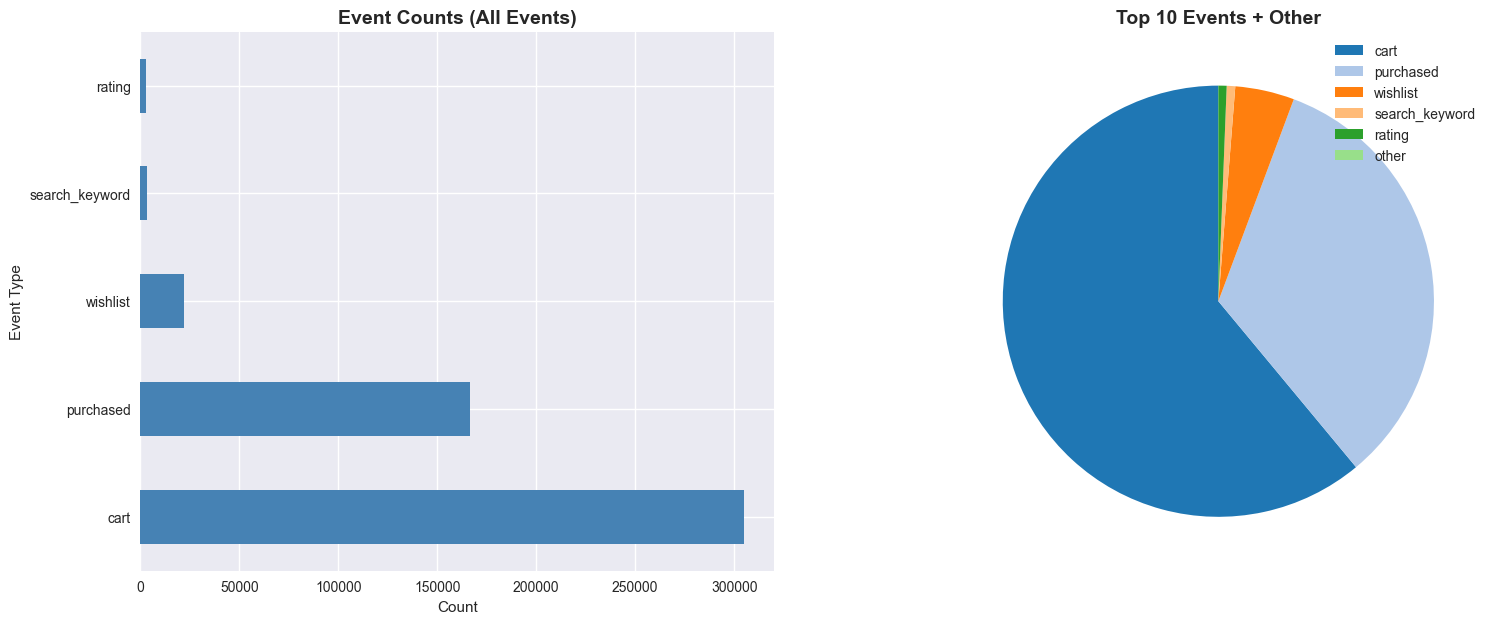

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap  # for wrapping long labels
from pathlib import Path

# -------------------------------
# Set output directory
# -------------------------------
OUTPUT_DIR = Path('./output')
OUTPUT_DIR.mkdir(exist_ok=True)

# -------------------------------
# Normalize column names and event names
# -------------------------------
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
df['event'] = df['event'].str.lower().str.strip()

# -------------------------------
# Event distribution summary
# -------------------------------
print("=" * 70)
print("📊 EVENT DISTRIBUTION")
print("=" * 70)

event_counts = df['event'].value_counts()
event_pct = (event_counts / len(df)) * 100

event_summary = pd.DataFrame({
    'Event': event_counts.index,
    'Count': event_counts.values,
    'Percentage': event_pct.values
})

print(event_summary.to_string(index=False))

# -------------------------------
# Visualize event distribution
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ---- Horizontal Bar Plot for all events ----
event_counts.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Event Counts (All Events)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Event Type')
axes[0].set_yticklabels([textwrap.fill(label, 20) for label in event_counts.index])

# ---- Pie Chart for top N events (no numbers inside slices) ----
top_n = 10
top_events = event_counts.head(top_n)
other_count = event_counts[top_n:].sum()

# Combine top events + "Other"
pie_data = pd.concat([top_events, pd.Series({'other': other_count})])

pie_data.plot(
    kind='pie',
    ax=axes[1],
    labels=None,      # Remove names inside slices
    autopct=None,     # Remove percentages inside slices
    startangle=90,
    colors=plt.cm.tab20.colors
)

axes[1].set_title(f'Top {top_n} Events + Other', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')  
axes[1].legend(pie_data.index, loc='best')  # Show event names outside as legend


In [ ]:
df.isnull().sum()

index           0
product_id      0
customer_id     0
product_name    0
event_date      0
event           0
dtype: int64

In [ ]:
df.columns

Index(['index', 'product_id', 'customer_id', 'product_name', 'Event_Date',
       'Event'],
      dtype='object')

## 4. Temporal Analysis


In [ ]:
# # Convert event_date to datetime
# df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Date range
print("=" * 70)
print("📅 TEMPORAL ANALYSIS")
print("=" * 70)

print(f"Date Range: {df['event_date'].min()} to {df['event_date'].max()}")
print(f"Total Days: {(df['event_date'].max() - df['event_date'].min()).days}")
print(f"Missing Dates: {df['event_date'].isnull().sum():,} ({df['event_date'].isnull().sum()/len(df)*100:.2f}%)")
# median_date = df['event_date'].median()
# df['event_date'] = df['event_date'].fillna(median_date)
# Interactions over time
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['day_of_week'] = df['event_date'].dt.dayofweek
df['hour'] = df['event_date'].dt.hour

# Daily interactions
daily_interactions = df.groupby(df['event_date'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_interactions.plot(kind='line', color='steelblue', linewidth=1.5)
plt.title('Daily Interactions Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'daily_interactions.png', dpi=300, bbox_inches='tight')
plt.show()


📅 TEMPORAL ANALYSIS


KeyError: 'event_date'

In [ ]:
df.isnull().sum()

index           0
product_id      0
customer_id     0
product_name    0
event_date      0
event           0
event_date      0
year            0
month           0
day             0
day_of_week     0
hour            0
dtype: int64

🔍 TEMPORAL ANALYSIS

📊 Temporal Overview:
   • Date Range: 2022-10-01 → 2023-03-31
   • Duration: 181 days (6.0 months)
   • Avg interactions/day: 2762

📊 Daily Statistics:
   • Mean: 2747
   • Std: 2324
   • Min day: 28
   • Max day: 10,474

📊 Recency Distribution:
   • Last  7 days: 57,506 interactions (11.5%)
   • Last 14 days: 86,242 interactions (17.2%)
   • Last 30 days: 165,259 interactions (33.1%)
   • Last 60 days: 316,418 interactions (63.3%)
   • Last 90 days: 411,461 interactions (82.3%)


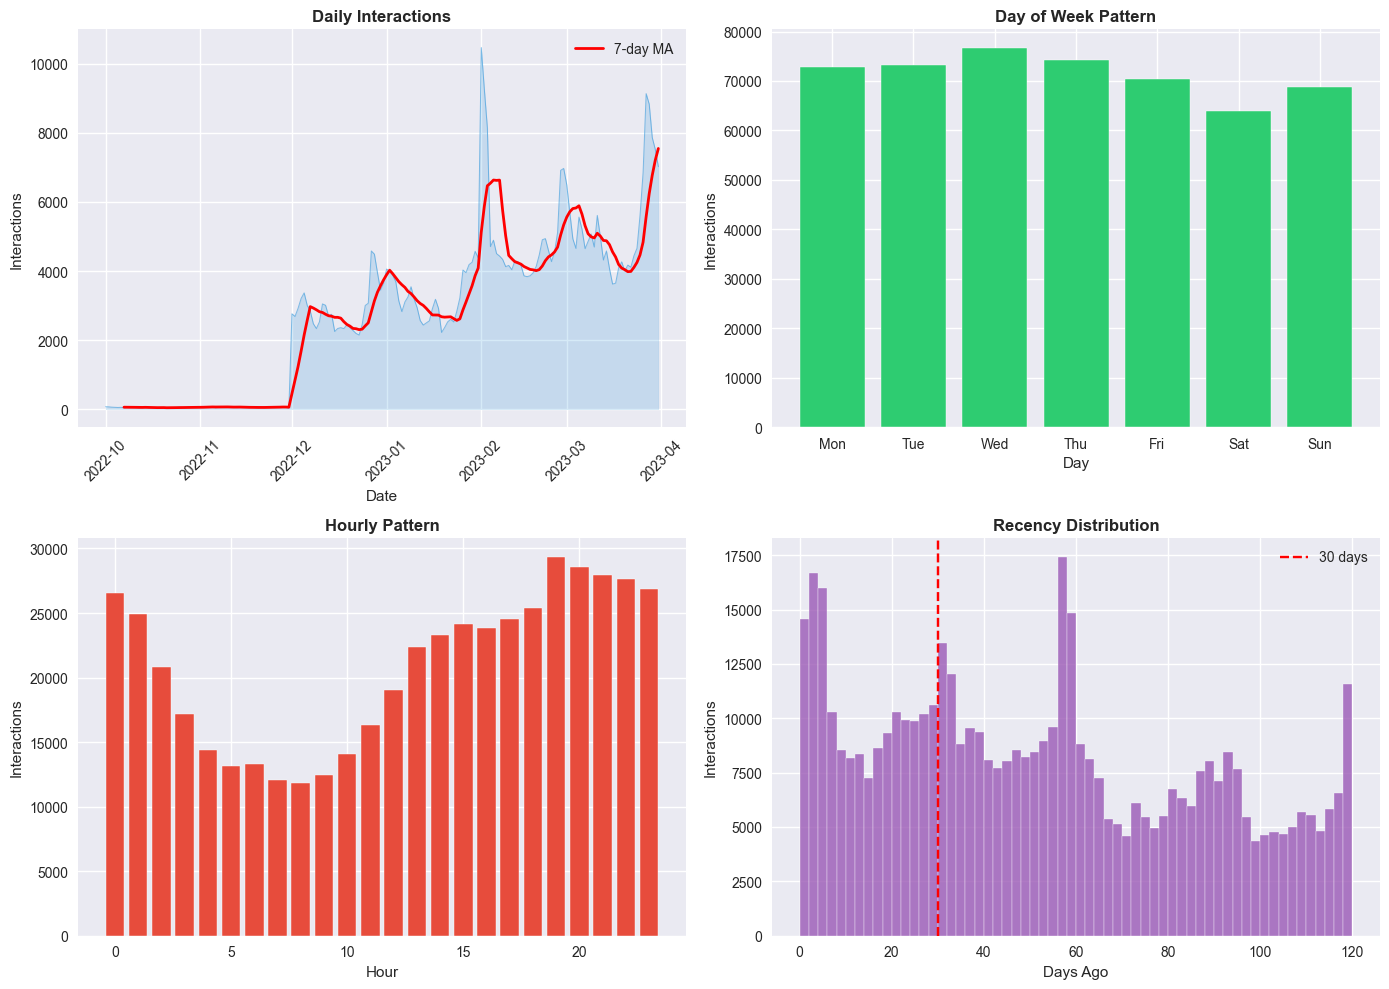


💡 TEMPORAL INSIGHTS
   • 33.1% of interactions in last 30 days
   → Historical patterns are important; balance recency with history


In [ ]:
# ============================================================
# CELL: TEMPORAL ANALYSIS (Simplified)
# ============================================================
import matplotlib.pyplot as plt
import pandas as pd

print("=" * 70)
print("🔍 TEMPORAL ANALYSIS")
print("=" * 70)

# Ensure event_date is datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')


# Date range and interactions
date_min, date_max = df['event_date'].min(), df['event_date'].max()
date_range_days = (date_max - date_min).days
avg_per_day = len(df) / max(date_range_days, 1)

print(f"\n📊 Temporal Overview:")
print(f"   • Date Range: {date_min.date()} → {date_max.date()}")
print(f"   • Duration: {date_range_days} days ({date_range_days/30:.1f} months)")
print(f"   • Avg interactions/day: {avg_per_day:.0f}")

# Daily trend
daily_counts = df.groupby(df['event_date'].dt.date).size()

print(f"\n📊 Daily Statistics:")
print(f"   • Mean: {daily_counts.mean():.0f}")
print(f"   • Std: {daily_counts.std():.0f}")
print(f"   • Min day: {daily_counts.min()}")
print(f"   • Max day: {daily_counts.max():,}")

# Recency (days since last interaction)
reference_date = df['event_date'].max()
df['days_ago'] = (reference_date - df['event_date']).dt.days

print(f"\n📊 Recency Distribution:")
for days in [7, 14, 30, 60, 90]:
    count = (df['days_ago'] <= days).sum()
    pct = count / len(df) * 100
    print(f"   • Last {days:2d} days: {count:,} interactions ({pct:.1f}%)")

# ====== PLOTS ======
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Daily interactions with 7-day rolling average
axes[0, 0].plot(daily_counts.index, daily_counts.values, color='#3498db', alpha=0.6, linewidth=0.7)
axes[0, 0].fill_between(daily_counts.index, daily_counts.values, alpha=0.2, color='#3498db')
rolling_avg = daily_counts.rolling(7).mean()
axes[0, 0].plot(rolling_avg.index, rolling_avg.values, color='red', linewidth=2, label='7-day MA')
axes[0, 0].set_title('Daily Interactions', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Interactions')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Day of week pattern
dow_counts = df.groupby('day_of_week').size()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_idx = [int(i) for i in dow_counts.index]
axes[0, 1].bar([day_names[i] for i in dow_idx], dow_counts.values, color='#2ecc71', edgecolor='white')
axes[0, 1].set_title('Day of Week Pattern', fontweight='bold')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Interactions')

# 3. Hourly pattern
hour_counts = df.groupby('hour').size()
axes[1, 0].bar(hour_counts.index, hour_counts.values, color='#e74c3c', edgecolor='white')
axes[1, 0].set_title('Hourly Pattern', fontweight='bold')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Interactions')

# 4. Recency histogram
axes[1, 1].hist(df['days_ago'].clip(upper=120), bins=60, color='#9b59b6', alpha=0.8, edgecolor='white')
axes[1, 1].axvline(30, color='red', linestyle='--', label='30 days')
axes[1, 1].set_title('Recency Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Days Ago')
axes[1, 1].set_ylabel('Interactions')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# ====== INSIGHTS ======
print("\n" + "="*70)
print("💡 TEMPORAL INSIGHTS")
print("="*70)
recent_30_pct = (df['days_ago'] <= 30).sum() / len(df) * 100
print(f"   • {recent_30_pct:.1f}% of interactions in last 30 days")
if recent_30_pct > 50:
    print("   → Recent activity is important; use recency weighting")
else:
    print("   → Historical patterns are important; balance recency with history")


## 5. User Analysis


In [ ]:
# User statistics
print("=" * 70)
print("👥 USER ANALYSIS")
print("=" * 70)

user_stats = df.groupby('customer_id').agg({
    'product_id': 'count',
    'event': lambda x: x.nunique(),
    'event_date': ['min', 'max']
}).reset_index()

user_stats.columns = ['customer_id', 'total_interactions', 'unique_events', 'first_interaction', 'last_interaction']
user_stats['user_lifetime_days'] = (user_stats['last_interaction'] - user_stats['first_interaction']).dt.days

print(f"\nTotal Unique Users: {df['customer_id'].nunique():,}")
print(f"\nUser Interaction Statistics:")
print(user_stats['total_interactions'].describe())

# User segmentation
warm_users = user_stats[user_stats['total_interactions'] >= 2]
cold_users = user_stats[user_stats['total_interactions'] == 1]

print(f"\n📊 User Segmentation:")
print(f"   Warm users (2+ interactions): {len(warm_users):,} ({len(warm_users)/len(user_stats)*100:.1f}%)")
print(f"   Cold users (1 interaction): {len(cold_users):,} ({len(cold_users)/len(user_stats)*100:.1f}%)")


👥 USER ANALYSIS


KeyError: "Column(s) ['event', 'event_date'] do not exist"

🔍 ANALYSIS 3: USER BEHAVIOR PATTERNS

📊 User Activity Statistics:
   • Mean: 1.15 interactions/user
   • Median: 1.00
   • Std: 0.54
   • Min: 1
   • Max: 39
   • 25th percentile: 1
   • 75th percentile: 1
   • 95th percentile: 2

📊 Cold User Analysis (KEY FOR MODEL SELECTION):
   • Users with ≤ 1 interactions: 384,428 (88.6%)
   • Users with ≤ 2 interactions: 423,463 (97.6%)
   • Users with ≤ 3 interactions: 430,566 (99.3%)
   • Users with ≤ 5 interactions: 433,135 (99.8%)
   • Users with ≤10 interactions: 433,707 (100.0%)
   • Users with ≤20 interactions: 433,777 (100.0%)


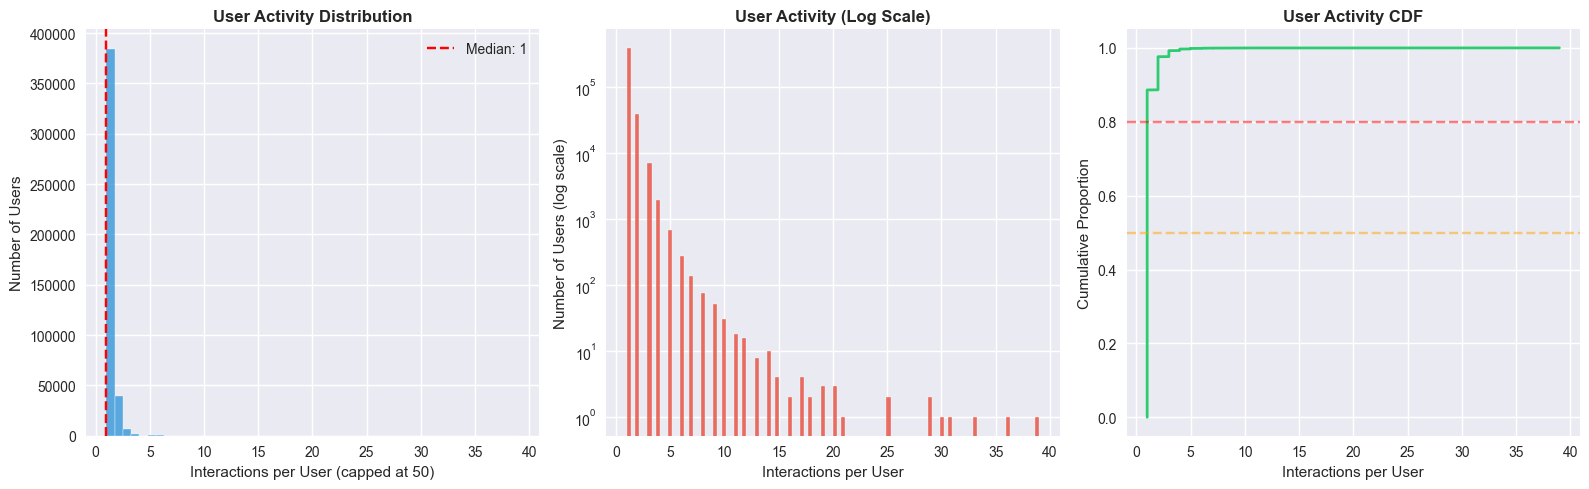

In [ ]:
# ============================================================
# CELL 5: USER BEHAVIOR ANALYSIS
# ============================================================
print("=" * 70)
print("🔍 ANALYSIS 3: USER BEHAVIOR PATTERNS")
print("=" * 70)

user_activity = df.groupby('customer_id').size()

print(f"\n📊 User Activity Statistics:")
print(f"   • Mean: {user_activity.mean():.2f} interactions/user")
print(f"   • Median: {user_activity.median():.2f}")
print(f"   • Std: {user_activity.std():.2f}")
print(f"   • Min: {user_activity.min()}")
print(f"   • Max: {user_activity.max():,}")
print(f"   • 25th percentile: {user_activity.quantile(0.25):.0f}")
print(f"   • 75th percentile: {user_activity.quantile(0.75):.0f}")
print(f"   • 95th percentile: {user_activity.quantile(0.95):.0f}")

# Cold user analysis (CRITICAL)
print(f"\n📊 Cold User Analysis (KEY FOR MODEL SELECTION):")
thresholds = [1, 2, 3, 5, 10, 20]
for t in thresholds:
    count = (user_activity <= t).sum()
    pct = count / len(user_activity) * 100
    print(f"   • Users with ≤{t:2d} interactions: {count:,} ({pct:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Distribution (capped for visibility)
axes[0].hist(user_activity.clip(upper=50), bins=50, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Interactions per User (capped at 50)')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('User Activity Distribution', fontweight='bold')
axes[0].axvline(user_activity.median(), color='red', linestyle='--', label=f'Median: {user_activity.median():.0f}')
axes[0].legend()

# Log-scale distribution
axes[1].hist(user_activity, bins=100, color='#e74c3c', edgecolor='white', alpha=0.8)
axes[1].set_xlabel('Interactions per User')
axes[1].set_ylabel('Number of Users (log scale)')
axes[1].set_title('User Activity (Log Scale)', fontweight='bold')
axes[1].set_yscale('log')

# CDF
sorted_activity = np.sort(user_activity.values)
cdf = np.arange(1, len(sorted_activity) + 1) / len(sorted_activity)
axes[2].plot(sorted_activity, cdf, color='#2ecc71', linewidth=2)
axes[2].set_xlabel('Interactions per User')
axes[2].set_ylabel('Cumulative Proportion')
axes[2].set_title('User Activity CDF', fontweight='bold')
axes[2].axhline(0.8, color='red', linestyle='--', alpha=0.5)
axes[2].axhline(0.5, color='orange', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




In [ ]:
# Power law test
print("\n" + "="*70)
print("💡 USER BEHAVIOR INSIGHTS:")
print("="*70)
one_interaction_pct = (user_activity == 1).sum() / len(user_activity) * 100
if one_interaction_pct > 70:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have ONLY 1 interaction!")
    print("   → These users CANNOT be learned by CF - filter them out")
    print("   → Or use popularity fallback for cold users")
elif one_interaction_pct > 50:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have only 1 interaction")
    print("   → Consider filtering or using hybrid approach")
else:
    print(f"   ✅ Only {one_interaction_pct:.1f}% single-interaction users")


💡 USER BEHAVIOR INSIGHTS:
   ⚠️ 88.6% users have ONLY 1 interaction!
   → These users CANNOT be learned by CF - filter them out
   → Or use popularity fallback for cold users


In [ ]:
# Power law test
print("\n" + "="*70)
print("💡 USER BEHAVIOR INSIGHTS:")
print("="*70)
one_interaction_pct = (user_activity == 1).sum() / len(user_activity) * 100
if one_interaction_pct > 70:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have ONLY 1 interaction!")
    print("   → These users CANNOT be learned by CF - filter them out")
    print("   → Or use popularity fallback for cold users")
elif one_interaction_pct > 50:
    print(f"   ⚠️ {one_interaction_pct:.1f}% users have only 1 interaction")
    print("   → Consider filtering or using hybrid approach")
else:
    print(f"   ✅ Only {one_interaction_pct:.1f}% single-interaction users")


💡 USER BEHAVIOR INSIGHTS:
   ⚠️ 88.6% users have ONLY 1 interaction!
   → These users CANNOT be learned by CF - filter them out
   → Or use popularity fallback for cold users


In [ ]:
# ---------------------------------------------
# 1. Count unique customers
# ---------------------------------------------
total_customers = df['customer_id'].nunique()  # e.g., 433787

# ---------------------------------------------
# 2. Count user interaction counts per event
# ---------------------------------------------
result = (
    df.groupby(['Event', 'customer_id'])
      .size()
      .reset_index(name='interaction_count')
      .groupby('Event')['interaction_count']
      .value_counts()
      .unstack(fill_value=0)
      .reset_index()
)

# ---------------------------------------------
# 3. Combine all interaction_count >= 4
# ---------------------------------------------
count_cols = [c for c in result.columns if isinstance(c, int) and c >= 4]
result['4+_users'] = result[count_cols].sum(axis=1)

# ---------------------------------------------
# 4. Prepare clean columns for users 1,2,3
# ---------------------------------------------
result['1_users'] = result.get(1, 0)
result['2_users'] = result.get(2, 0)
result['3_users'] = result.get(3, 0)
result['0_user'] = total_customers - (result['1_users'] + result['2_users'] + result['3_users'] + result['4+_users'])

# ---------------------------------------------
# 5. Total users involved in this event
# ---------------------------------------------
result['users_total_1_to_4+'] = result['1_users'] + result['2_users'] + result['3_users'] + result['4+_users']
result['total_users'] = result['users_total_1_to_4+'] + result['0_user']

# ---------------------------------------------
# 6. Add total interactions per event
# ---------------------------------------------
total_interactions = df.groupby('Event').size().reset_index(name='total_interactions')
result = result.merge(total_interactions, on='Event')

# ---------------------------------------------
# 7. Final clean output table
# ---------------------------------------------
result = result[
    [
        'Event',
        '0_user',
        '1_users',
        '2_users',
        '3_users',
        '4+_users',
        'users_total_1_to_4+',
        'total_users',
        'total_interactions'
    ]
].sort_values('Event')

# ---------------------------------------------
# 8. Print clean rounded output
# ---------------------------------------------
print(result.round(0).to_string(index=False))


         Event  0_user  1_users  2_users  3_users  4+_users  users_total_1_to_4+  total_users  total_interactions
          cart  163746   243434    21334     3656      1617               270041       433787              305129
     purchased  278686   146147     7609      942       403               155101       433787              166423
        rating  430814     2881       81        9         2                 2973       433787                3079
search_keyword  430769     2886      111       15         6                 3018       433787                3190
      wishlist  412886    19748     1046       95        12                20901       433787               22179


In [ ]:
# Step 1: Count unique users per product
product_user_counts = df.groupby('product_id')['customer_id'].nunique()

# Step 2: Keep products with exactly 1 user
single_user_products = product_user_counts[product_user_counts == 1].index

# Step 3: Count unique products per customer
customer_product_counts = df.groupby('customer_id')['product_id'].nunique()

# Step 4: Keep customers who interacted with exactly 1 product
single_product_customers = customer_product_counts[customer_product_counts == 1].index

# Step 5: Filter df for rows where both conditions are satisfied
mutual_one_to_one = df[
    (df['product_id'].isin(single_user_products)) &
    (df['customer_id'].isin(single_product_customers))
]

# Step 6: Remove duplicates (in case multiple events exist)
mutual_one_to_one = mutual_one_to_one[['product_id', 'customer_id', 'product_name']].drop_duplicates()

# Result
print(mutual_one_to_one.head())
print(f"Total strictly mutual one-to-one interactions: {len(mutual_one_to_one)}")


    product_id  customer_id                     product_name
3            4     13235575             ساعة يد رجالية M34-2
7            8       193403            تشقير حواجب بدون رتوش
9           10       876328                          عطر 010
11          12     13197905  اقراص قطنية نقية للتجميل جونسون
23          24     12674187                         تشيز كيك
Total strictly mutual one-to-one interactions: 101474


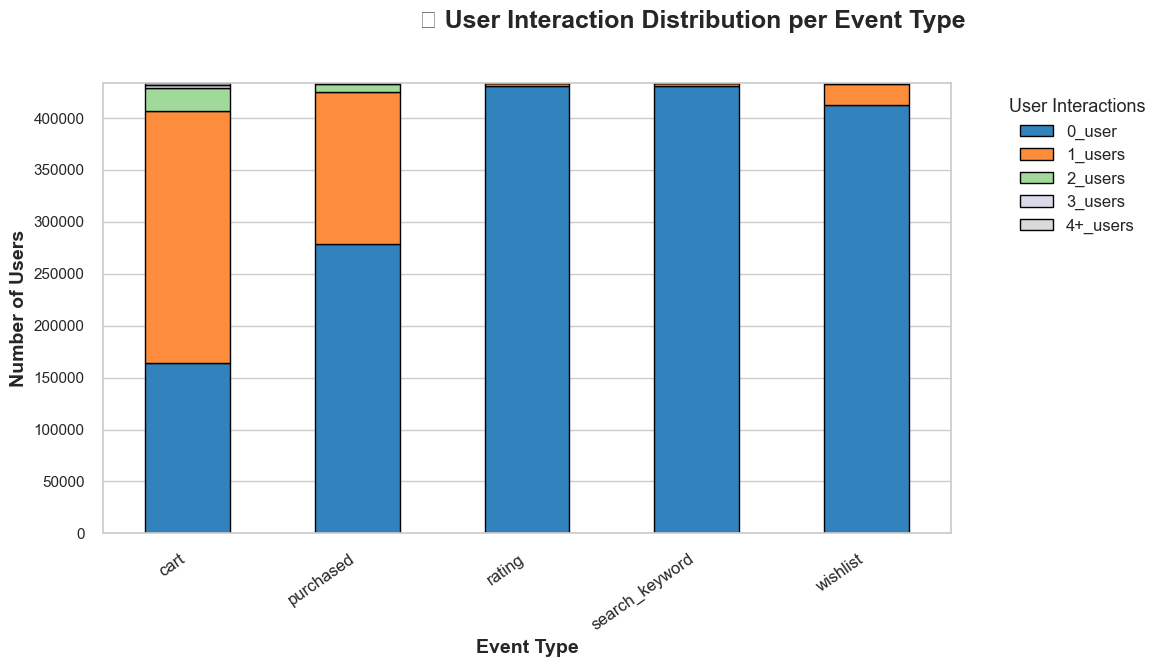

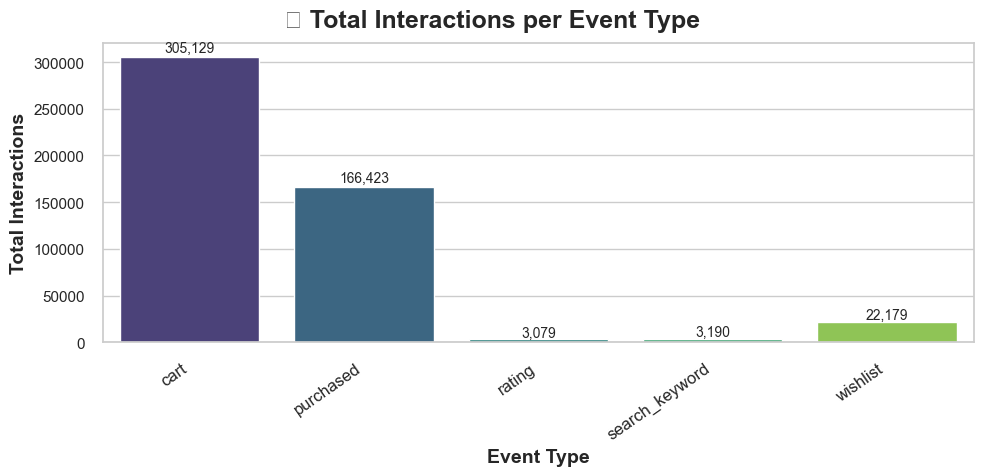

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -------------------------------
# 1. Stacked bar chart: Users per event
# -------------------------------
stack_cols = ['0_user', '1_users', '2_users', '3_users', '4+_users']
stack_data = result.set_index('Event')[stack_cols]

fig, ax = plt.subplots(figsize=(14, 7))

stack_data.plot(
    kind='bar',
    stacked=True,
    colormap='tab20c',
    edgecolor='black',
    ax=ax
)

# Labels and title
ax.set_xlabel("Event Type", fontsize=14, fontweight='bold')
ax.set_ylabel("Number of Users", fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right', fontsize=12)
ax.legend(title="User Interactions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)
fig.suptitle("📊 User Interaction Distribution per Event Type", fontsize=18, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0, 0.85, 0.93])
plt.show()


# -------------------------------
# 2. Total interactions per event (separate chart)
# -------------------------------
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data=result,
    x='Event',
    y='total_interactions',
    palette='viridis',
    ax=ax
)

# Labels and title
ax.set_xlabel("Event Type", fontsize=14, fontweight='bold')
ax.set_ylabel("Total Interactions", fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right', fontsize=12)
fig.suptitle("📈 Total Interactions per Event Type", fontsize=18, fontweight='bold', y=0.95)

# Add values on top of bars
for i, total in enumerate(result['total_interactions']):
    ax.text(i, total + total*0.01, f"{int(total):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


🔍 ANALYSIS 7: CO-OCCURRENCE PATTERNS (CF Feasibility)

📊 Products per User:
   • Mean: 1.14
   • Median: 1.00
   • Max: 36

📊 Users per Product:
   • Mean: 2.47
   • Median: 1.00
   • Max: 2532

📊 Co-occurrence Analysis (sampled):
   • Products with 2+ users: 61,077 (30.5%)
   ⚠️ No shared users found between sampled product pairs!


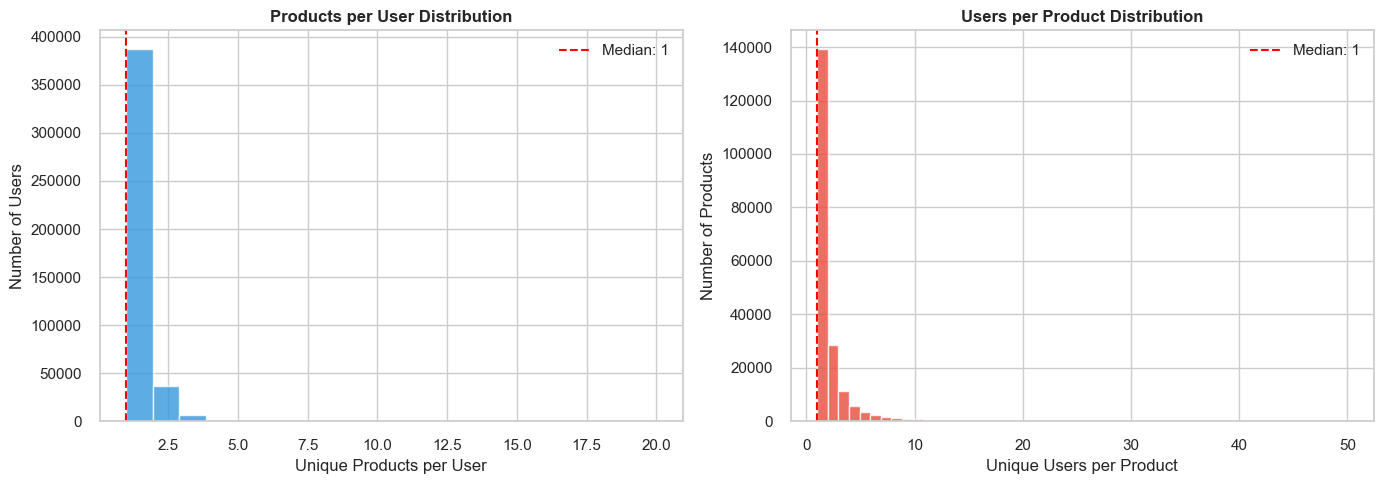


💡 CO-OCCURRENCE INSIGHTS:
   ⚠️ 89.3% users interact with ONLY 1 product!
   → User-based CF will fail - these users have no cross-product signal
   → Consider: Product-based recommendations, Popularity, Content-based


In [ ]:
# ============================================================
# CELL 9: CO-OCCURRENCE ANALYSIS (CF Feasibility Check)
# ============================================================
# This is CRITICAL - if products don't share users, CF won't work!

print("=" * 70)
print("🔍 ANALYSIS 7: CO-OCCURRENCE PATTERNS (CF Feasibility)")
print("=" * 70)

# How many products does each user interact with?
user_product_counts = df.groupby('customer_id')['product_id'].nunique()

print(f"\n📊 Products per User:")
print(f"   • Mean: {user_product_counts.mean():.2f}")
print(f"   • Median: {user_product_counts.median():.2f}")
print(f"   • Max: {user_product_counts.max()}")

# How many users does each product have?
product_user_counts = df.groupby('product_id')['customer_id'].nunique()

print(f"\n📊 Users per Product:")
print(f"   • Mean: {product_user_counts.mean():.2f}")
print(f"   • Median: {product_user_counts.median():.2f}")
print(f"   • Max: {product_user_counts.max()}")

# Sample co-occurrence check (expensive for full data)
print("\n📊 Co-occurrence Analysis (sampled):")

# Get products with 2+ users
products_with_users = product_user_counts[product_user_counts >= 2]
print(f"   • Products with 2+ users: {len(products_with_users):,} ({len(products_with_users)/len(product_user_counts)*100:.1f}%)")

# Sample some products and check user overlap
if len(products_with_users) > 100:
    sample_products = np.random.choice(products_with_users.index, min(100, len(products_with_users)), replace=False)
else:
    sample_products = products_with_users.index.tolist()

# Build product -> users mapping for sampled products
product_users = df[df['product_id'].isin(sample_products)].groupby('product_id')['customer_id'].apply(set)

# Check overlap between product pairs
overlaps = []
products_list = list(product_users.keys())
for i in range(min(50, len(products_list))):
    for j in range(i+1, min(50, len(products_list))):
        p1, p2 = products_list[i], products_list[j]
        overlap = len(product_users[p1] & product_users[p2])
        if overlap > 0:
            overlaps.append(overlap)

if overlaps:
    print(f"   • Product pairs with shared users: {len(overlaps)} (of sampled pairs)")
    print(f"   • Avg users in common: {np.mean(overlaps):.2f}")
    print(f"   • Max users in common: {max(overlaps)}")
else:
    print(f"   ⚠️ No shared users found between sampled product pairs!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(user_product_counts.clip(upper=20), bins=20, color='#3498db', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Unique Products per User')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Products per User Distribution', fontweight='bold')
axes[0].axvline(user_product_counts.median(), color='red', linestyle='--', label=f'Median: {user_product_counts.median():.0f}')
axes[0].legend()

axes[1].hist(product_user_counts.clip(upper=50), bins=50, color='#e74c3c', edgecolor='white', alpha=0.8)
axes[1].set_xlabel('Unique Users per Product')
axes[1].set_ylabel('Number of Products')
axes[1].set_title('Users per Product Distribution', fontweight='bold')
axes[1].axvline(product_user_counts.median(), color='red', linestyle='--', label=f'Median: {product_user_counts.median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("💡 CO-OCCURRENCE INSIGHTS:")
print("="*70)

single_product_users = (user_product_counts == 1).sum()
single_product_users_pct = single_product_users / len(user_product_counts) * 100

if single_product_users_pct > 80:
    print(f"   ⚠️ {single_product_users_pct:.1f}% users interact with ONLY 1 product!")
    print("   → User-based CF will fail - these users have no cross-product signal")
    print("   → Consider: Product-based recommendations, Popularity, Content-based")
elif single_product_users_pct > 50:
    print(f"   ⚠️ {single_product_users_pct:.1f}% users interact with only 1 product")
    print("   → CF needs filtering of cold users")
else:
    print(f"   ✅ Only {single_product_users_pct:.1f}% single-product users - CF viable")


## 6. Product Analysis


In [ ]:
df.columns

Index(['index', 'product_id', 'customer_id', 'product_name', 'Event_Date',
       'Event'],
      dtype='object')

In [ ]:
# Convert Event_Date to datetime
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')


In [ ]:
# Product statistics
print("=" * 70)
print("🛍️  PRODUCT ANALYSIS")
print("=" * 70)

product_stats = df.groupby('product_id').agg({
    'customer_id': ['count', 'nunique'],
    'Event': lambda x: x.nunique(),
    'Event_Date': ['min', 'max']
}).reset_index()

product_stats.columns = ['product_id', 'total_interactions', 'unique_users', 'unique_events', 'first_interaction', 'last_interaction']

print(f"\nTotal Unique Products: {df['product_id'].nunique():,}")
print(f"\nProduct Interaction Statistics:")
print(product_stats['total_interactions'].describe())

# Popular products
top_products = product_stats.nlargest(20, 'total_interactions')
print(f"\n📊 Top 10 Most Popular Products:")
print(top_products[['product_id', 'total_interactions', 'unique_users']].head(10).to_string(index=False))


🛍️  PRODUCT ANALYSIS

Total Unique Products: 200,325

Product Interaction Statistics:
count    200325.000000
mean          2.495944
std          13.580165
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2556.000000
Name: total_interactions, dtype: float64

📊 Top 10 Most Popular Products:
 product_id  total_interactions  unique_users
        379                2556          2532
        126                2282          2268
        491                2128          2114
        274                1181          1176
        130                1115          1110
       1862                 846           835
        218                 812           807
        709                 762           749
       1290                 708           704
        565                 688           683


In [ ]:
from pprint import pprint

print("=" * 70)
print("🛍️  PRODUCT ANALYSIS")
print("=" * 70)

# Total unique products
total_products = df['product_id'].nunique()
print(f"\nTotal Unique Products: {total_products:,}")

# Product interaction statistics
product_stats = df.groupby(['product_id', 'product_name']).agg({
    'customer_id': ['count', 'nunique'],
    'Event': lambda x: x.nunique(),
    'Event_Date': ['min', 'max']
}).reset_index()

# Flatten MultiIndex columns
product_stats.columns = ['product_id', 'product_name', 'total_interactions', 'unique_users', 'unique_events', 'first_interaction', 'last_interaction']

print(f"\nProduct Interaction Statistics:")
pprint(product_stats['total_interactions'].describe())

# Top 10 most popular products
top_products = product_stats.nlargest(10, 'total_interactions')
print(f"\n📊 Top 10 Most Popular Products:")
pprint(top_products[['product_name', 'total_interactions', 'unique_users']].to_dict(orient='records'))


🛍️  PRODUCT ANALYSIS

Total Unique Products: 200,325

Product Interaction Statistics:
count    200627.000000
mean          2.492187
std          13.080184
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2556.000000
Name: total_interactions, dtype: float64

📊 Top 10 Most Popular Products:
[{'product_name': 'عطر 379', 'total_interactions': 2556, 'unique_users': 2532},
 {'product_name': 'عطر 491', 'total_interactions': 2128, 'unique_users': 2114},
 {'product_name': 'ماكينة  لكامل الجسم للرجال والنساء لون أسود',
  'total_interactions': 1311,
  'unique_users': 1303},
 {'product_name': 'عطر 274', 'total_interactions': 1181, 'unique_users': 1176},
 {'product_name': 'مناديل 500 مفرد',
  'total_interactions': 1115,
  'unique_users': 1110},
 {'product_name': 'ماكينة  لكامل الجسم للرجال والنساء لون أزرق غامق مميز',
  'total_interactions': 971,
  'unique_users': 968},
 {'product_name': 'عطر 1862', 'total_interactions': 846, 'unique_users': 835

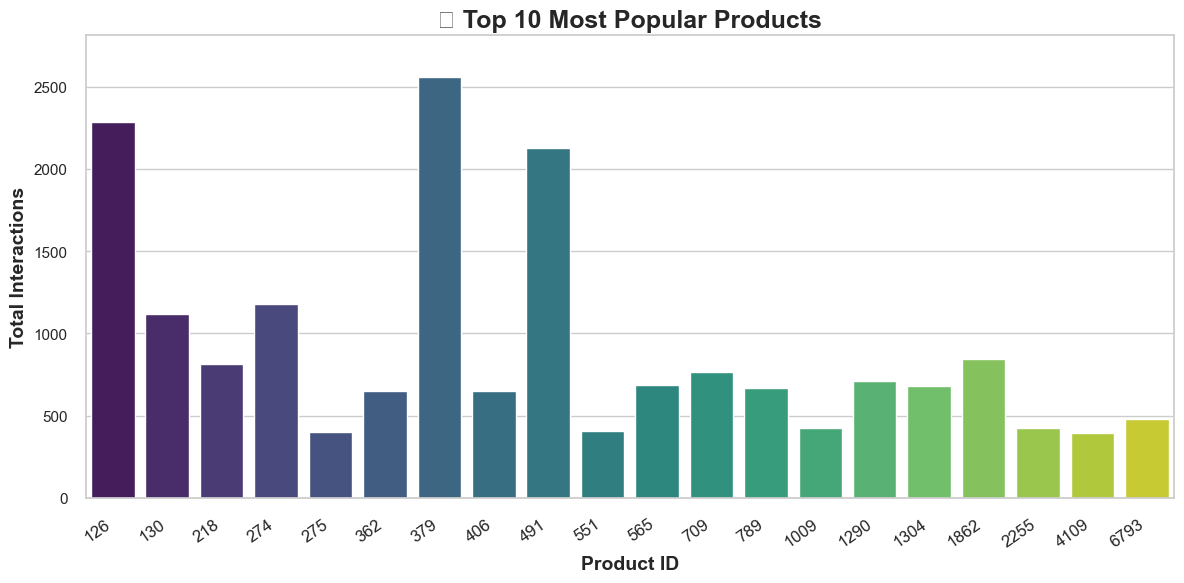

In [ ]:
# -------------------------------
# 3. Visualization: Top 10 products
# -------------------------------
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=top_products,
    x='product_id',
    y='total_interactions',
    palette='viridis',
    ax=ax
)
ax.set_xlabel("Product ID", fontsize=14, fontweight='bold')
ax.set_ylabel("Total Interactions", fontsize=14, fontweight='bold')
ax.set_title("📊 Top 10 Most Popular Products", fontsize=18, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right', fontsize=12)
max_total = top_products['total_interactions'].max()
ax.set_ylim(0, max_total * 1.1)  # 10% padding above tallest bar

# # Add labels on top with fixed offset
# for i, total in enumerate(top_products['total_interactions']):
#     ax.text(
#         i, 
#         total + max_total * 0.02,  # 2% of max_total as offset
#         f"{int(total):,}", 
#         ha='center', 
#         va='bottom', 
#         fontsize=10,
#         fontweight='bold'
#     )

plt.tight_layout()
plt.show()


## 7. Summary and Insights


In [ ]:
# Generate summary report
print("=" * 70)
print("📋 EDA SUMMARY REPORT")
print("=" * 70)

# Calculate sparsity
n_users = df['customer_id'].nunique()
n_products = df['product_id'].nunique()
n_interactions = len(df)
total_possible = n_users * n_products
sparsity = (1 - (n_interactions / total_possible)) * 100

summary = {
    'Dataset Size': f"{df.shape[0]:,} rows × {df.shape[1]} columns",
    'Total Users': f"{n_users:,}",
    'Total Products': f"{n_products:,}",
    'Total Interactions': f"{n_interactions:,}",
    'Date Range': f"{df['Event_Date'].min()} to {df['Event_Date'].max()}",
    'Missing Values': f"{df.isnull().sum().sum():,} ({df.isnull().sum().sum()/len(df)*100:.2f}%)",
    'Sparsity': f"{sparsity:.2f}%",
    'Warm Users': f"{len(warm_users):,} ({len(warm_users)/len(user_stats)*100:.1f}%)",
    'Cold Users': f"{len(cold_users):,} ({len(cold_users)/len(user_stats)*100:.1f}%)",
    'Unique Events': f"{df['event'].nunique()}",
    'Event Types': list(df['event'].unique())
}

for key, value in summary.items():
    print(f"\n{key}: {value}")

# Save summary to file
import json
with open(OUTPUT_DIR / 'eda_summary.json', 'w') as f:
    json.dump(summary, f, indent=2, default=str)

print(f"\n\n✅ EDA Summary saved to {OUTPUT_DIR / 'eda_summary.json'}")
print(f"✅ All visualizations saved to {OUTPUT_DIR}")


📋 EDA SUMMARY REPORT


NameError: name 'warm_users' is not defined

In [ ]:
# ============================================================
# CELL 10: SUMMARY OF FINDINGS & DATA PROFILE
# ============================================================
print("=" * 70)
print("📊 DATA PROFILE SUMMARY")
print("=" * 70)

# Recalculate key metrics to avoid NameError
n_users = df['customer_id'].nunique()
n_products = df['product_id'].nunique()
n_interactions = len(df)
n_unique_pairs = df.groupby(['customer_id', 'product_id']).ngroups
possible_pairs = n_users * n_products
sparsity = 1 - (n_unique_pairs / possible_pairs)

# Recalculate user/product activity
user_activity = df.groupby('customer_id').size()
product_popularity = df.groupby('product_id').size()
user_product_counts = df.groupby('customer_id')['product_id'].nunique()
single_product_users_pct = (user_product_counts == 1).sum() / len(user_product_counts) * 100

# Event percentages
event_pct = (df['Event'].value_counts(normalize=True) * 100)

# Top 20% coverage
top_20_pct_products = int(len(product_popularity) * 0.2)
top_20_pct_interactions = product_popularity.nlargest(top_20_pct_products).sum()
top_20_pct_share = top_20_pct_interactions / n_interactions * 100

# Collect all metrics
profile = {
    'total_interactions': len(df),
    'unique_users': n_users,
    'unique_products': n_products,
    'sparsity': sparsity * 100,
    'single_interaction_users_pct': (user_activity == 1).sum() / len(user_activity) * 100,
    'single_interaction_products_pct': (product_popularity == 1).sum() / len(product_popularity) * 100,
    'single_product_users_pct': single_product_users_pct,
    'top_20_products_coverage': top_20_pct_share,
    'purchase_event_pct': event_pct.get('purchased', 0),
    'cart_event_pct': event_pct.get('cart', 0),
    'mean_interactions_per_user': user_activity.mean(),
    'mean_interactions_per_product': product_popularity.mean(),
}

print("\n📋 Key Metrics:")
for key, value in profile.items():
    if isinstance(value, float):
        print(f"   • {key}: {value:.2f}")
    else:
        print(f"   • {key}: {value:,}")

# Severity scores
print("\n" + "=" * 70)
print("⚠️ CHALLENGE SEVERITY ASSESSMENT")
print("=" * 70)

challenges = []

# Sparsity challenge
if sparsity > 0.9999:
    challenges.append(("Extreme Sparsity", "CRITICAL", "Matrix >99.99% empty"))
elif sparsity > 0.999:
    challenges.append(("High Sparsity", "HIGH", "Matrix >99.9% empty"))
else:
    challenges.append(("Sparsity", "MODERATE", f"Matrix {sparsity*100:.2f}% empty"))

# Cold user challenge
cold_user_pct = profile['single_interaction_users_pct']
if cold_user_pct > 80:
    challenges.append(("Cold Users", "CRITICAL", f"{cold_user_pct:.0f}% users have 1 interaction"))
elif cold_user_pct > 50:
    challenges.append(("Cold Users", "HIGH", f"{cold_user_pct:.0f}% users have 1 interaction"))
else:
    challenges.append(("Cold Users", "MODERATE", f"{cold_user_pct:.0f}% users have 1 interaction"))

# Cold product challenge
cold_product_pct = profile['single_interaction_products_pct']
if cold_product_pct > 80:
    challenges.append(("Cold Products", "CRITICAL", f"{cold_product_pct:.0f}% products have 1 interaction"))
elif cold_product_pct > 50:
    challenges.append(("Cold Products", "HIGH", f"{cold_product_pct:.0f}% products have 1 interaction"))
else:
    challenges.append(("Cold Products", "MODERATE", f"{cold_product_pct:.0f}% products have 1 interaction"))

# Co-occurrence challenge
if single_product_users_pct > 80:
    challenges.append(("Co-occurrence", "CRITICAL", f"{single_product_users_pct:.0f}% users buy 1 product"))
elif single_product_users_pct > 50:
    challenges.append(("Co-occurrence", "HIGH", f"{single_product_users_pct:.0f}% users buy 1 product"))
else:
    challenges.append(("Co-occurrence", "LOW", f"{single_product_users_pct:.0f}% users buy 1 product"))

for challenge, severity, detail in challenges:
    emoji = "🔴" if severity == "CRITICAL" else "🟡" if severity == "HIGH" else "🟢"
    print(f"   {emoji} {challenge}: {severity} - {detail}")


📊 DATA PROFILE SUMMARY

📋 Key Metrics:
   • total_interactions: 500,000
   • unique_users: 433,787
   • unique_products: 200,325
   • sparsity: 100.00
   • single_interaction_users_pct: 88.62
   • single_interaction_products_pct: 69.08
   • single_product_users_pct: 89.25
   • top_20_products_coverage: 63.57
   • purchase_event_pct: 33.28
   • cart_event_pct: 61.03
   • mean_interactions_per_user: 1.15
   • mean_interactions_per_product: 2.50

⚠️ CHALLENGE SEVERITY ASSESSMENT
   🔴 Extreme Sparsity: CRITICAL - Matrix >99.99% empty
   🔴 Cold Users: CRITICAL - 89% users have 1 interaction
   🟡 Cold Products: HIGH - 69% products have 1 interaction
   🔴 Co-occurrence: CRITICAL - 89% users buy 1 product
